TensorFlow version: 2.17.0
Pandas version: 2.2.3


Loading the dataset...
Dataset loaded successfully.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None

First 5 rows of the dataset:
   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)



Starting model training...
Shapes before training:
X_train_preprocessed shape: (4768, 18)
y_train_np shape: (4768,)
Epoch 1/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.4982 - accuracy: 0.4575 - loss: 0.7321 - precision: 0.1970 - recall: 0.5577 - val_AUC: 0.7669 - val_accuracy: 0.6950 - val_loss: 0.6511 - val_precision: 0.3552 - val_recall: 0.7027
Epoch 2/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7254 - accuracy: 0.6359 - loss: 0.6281 - precision: 0.3308 - recall: 0.7067 - val_AUC: 0.7964 - val_accuracy: 0.7767 - val_loss: 0.5604 - val_precision: 0.4462 - val_recall: 0.6270
Epoch 3/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7730 - accuracy: 0.7395 - loss: 0.5608 - precision: 0.3956 - recall: 0.6536 - val_AUC: 0.8084 - val_accuracy: 0.8019 - val_loss: 0.5107 - val_precision: 0.4913 - val_recall: 0.6108
Epoch 4/200
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7973 - accuracy: 0.7728 - loss: 0.5449 - precision: 0.4529 - recall: 0.6891 - val_AUC: 0.81

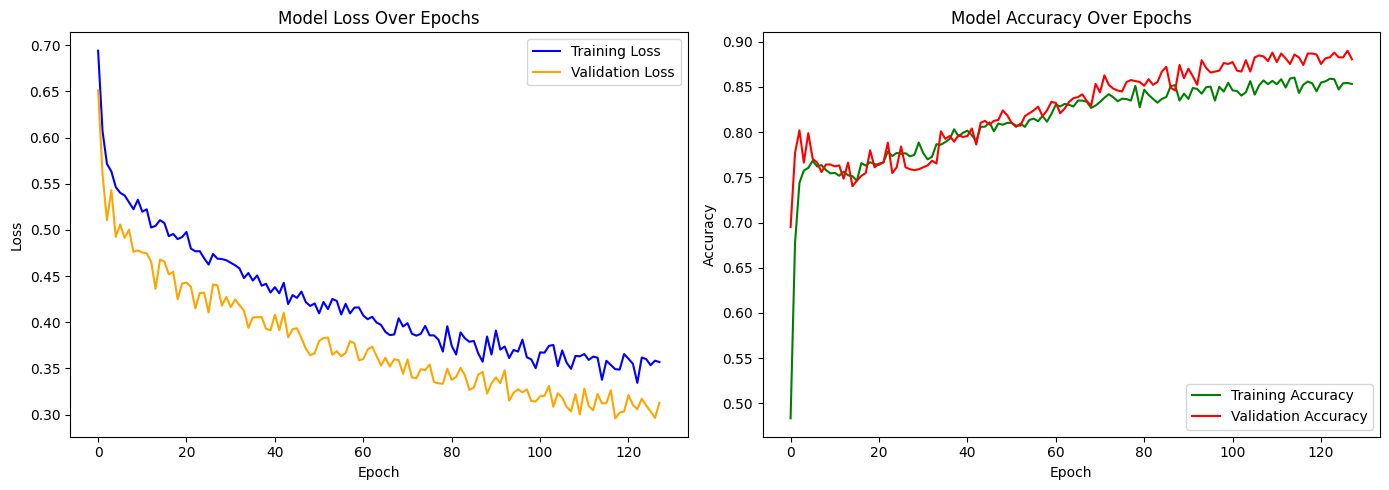

Training history plotted successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import class_weight
import pickle

# Optional: Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# 0. Check Library Versions for Compatibility
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print("\n" + "="*80 + "\n")

# 1. Load the dataset
print("Loading the dataset...")
try:
    df = pd.read_csv('C:/Users/swaro/OneDrive/Documents/GitHub/Credit-Risk-Assessment-using-Feed-Forward-Neural-Networks/Datasets/hmeq.csv')
    print("Dataset loaded successfully.\n")
except FileNotFoundError:
    print("Error: The file 'hmeq.csv' was not found.")
    exit()

# 2. Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
print("\nTarget Variable Distribution (BAD):")
print(df['BAD'].value_counts())
print("\n" + "="*80 + "\n")

# 3. Define features and target
print("Defining features and target variable...")
X = df.drop('BAD', axis=1)
y = df['BAD']
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("Unique values in target variable:", y.unique())
print("\n" + "="*80 + "\n")

# 4. Split the data
print("Splitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Reset indices to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("Data split successfully.")
print(f"Training Features shape: {X_train.shape}")
print(f"Testing Features shape: {X_test.shape}")
print(f"Training Target distribution:\n{y_train.value_counts()}")
print(f"Testing Target distribution:\n{y_test.value_counts()}")
print("\n" + "="*80 + "\n")

# 5. Preprocessing
print("Starting data preprocessing...")

numeric_features = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
                    'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical_features = ['REASON', 'JOB']

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

# Define preprocessing steps for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipelines defined.")

# Fit and transform the training data
print("\nFitting and transforming the training data...")
X_train_preprocessed = preprocessor.fit_transform(X_train)
print("Training data preprocessed.")
print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")

# Transform the testing data
print("\nTransforming the testing data...")
X_test_preprocessed = preprocessor.transform(X_test)

# Save the preprocessor to a .pkl file
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


print("Testing data preprocessed.")
print(f"Preprocessed testing data shape: {X_test_preprocessed.shape}")

print("\nPreprocessing completed successfully.")
print("\n" + "="*80 + "\n")

# 6. Handle class imbalance
print("Handling class imbalance...")

# Check class distribution in training data
print("\nTraining Target Distribution:")
print(y_train.value_counts())

# Calculate class weights
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights_values)}
print(f"\nComputed Class Weights: {class_weights_dict}")

print("\nClass imbalance handled.\n")
print("\n" + "="*80 + "\n")

# 7. Build the model
print("Building the Multi-Layer Perceptron (MLP) model...")

input_dim = X_train_preprocessed.shape[1]
print(f"Input dimension: {input_dim}")

model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC',Precision(name='precision'), Recall(name='recall')]
)

print("Model architecture:")
model.summary()

print("\n" + "="*80 + "\n")

# 8. Train the model
print("Starting model training...")

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 9. Convert target variables to NumPy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# 10. Check for NaN values in preprocessed features and labels
if np.any(np.isnan(X_train_preprocessed)):
    print("Warning: NaN values detected in the preprocessed training features.")
if np.any(np.isnan(y_train_np)):
    print("Warning: NaN values detected in the training labels.")

print("Shapes before training:")
print(f"X_train_preprocessed shape: {X_train_preprocessed.shape}")
print(f"y_train_np shape: {y_train_np.shape}")

# 11. Train the model using NumPy arrays
try:
    history = model.fit(
        X_train_preprocessed,
        y_train_np,  # Use the NumPy array
        epochs=200,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stopping],
        class_weight=class_weights_dict,
        verbose=1  # Set to 1 to show progress bar
    )
except Exception as e:
    print("Error during model training:", e)

print("\nModel training completed.")
print("\n" + "="*80 + "\n")

# 12. Evaluate the model
print("Evaluating the model on the test data...")

# Predict probabilities
y_pred_prob = model.predict(X_test_preprocessed).ravel()
print("Predicted probabilities calculated.")

# Convert probabilities to class labels (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)
print("Predicted class labels determined based on threshold 0.5.")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))

# ROC-AUC Score
auc_score = roc_auc_score(y_test_np, y_pred_prob)
print(f"ROC-AUC Score: {auc_score:.4f}")

print("\n" + "="*80 + "\n")

# 13. Optional: Visualize Training History
import matplotlib.pyplot as plt

print("Plotting training history...")

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print("Training history plotted successfully.")



# Baseline Models Comparison 

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


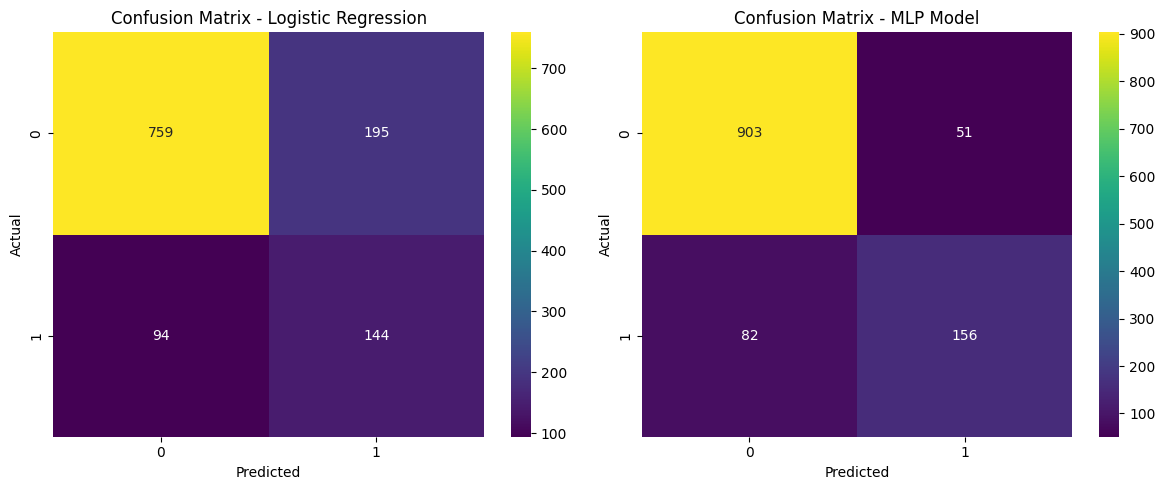

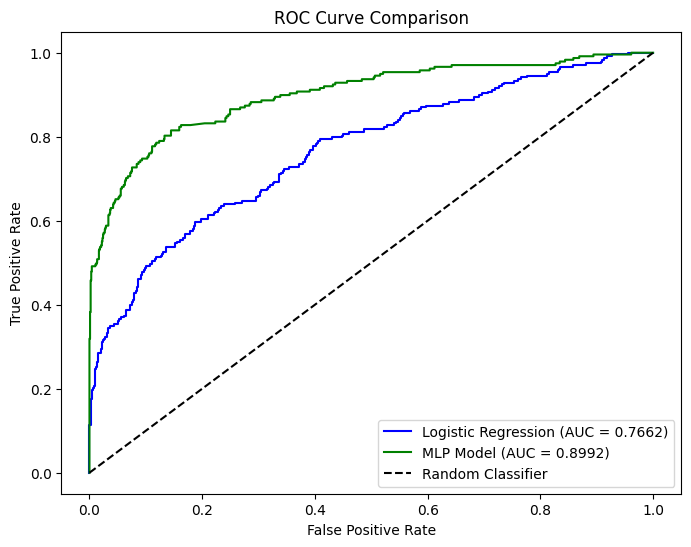

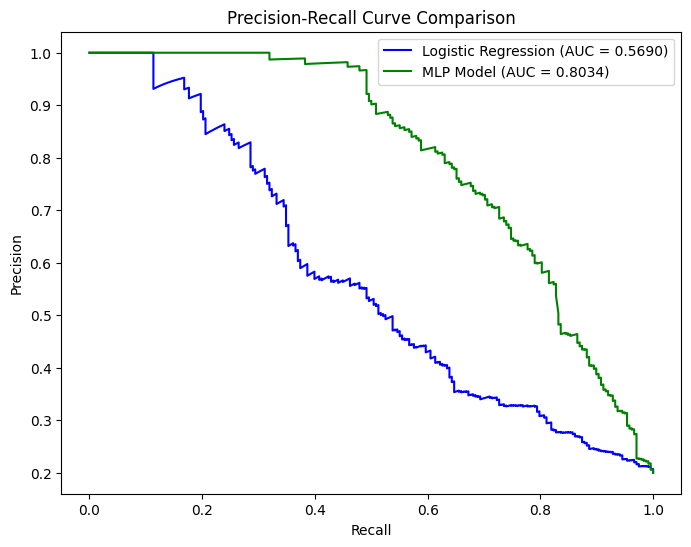


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall   ROC-AUC
0  Logistic Regression  0.757550   0.424779  0.605042  0.766234
1   MLP Neural Network  0.880503   0.678392  0.729730  0.895283


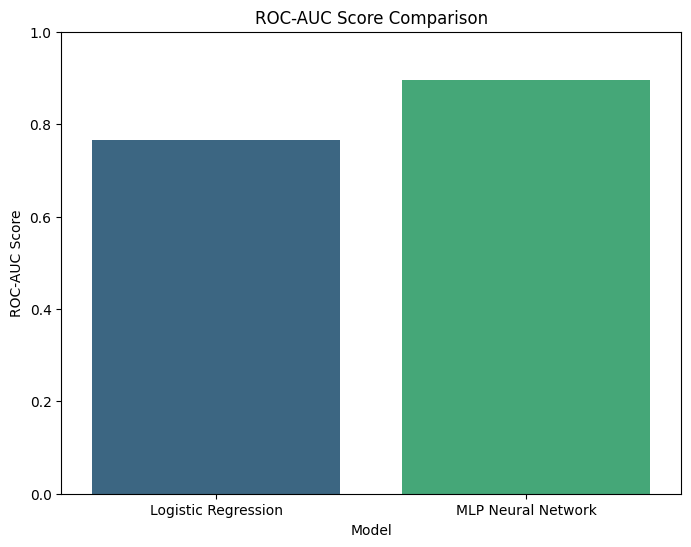

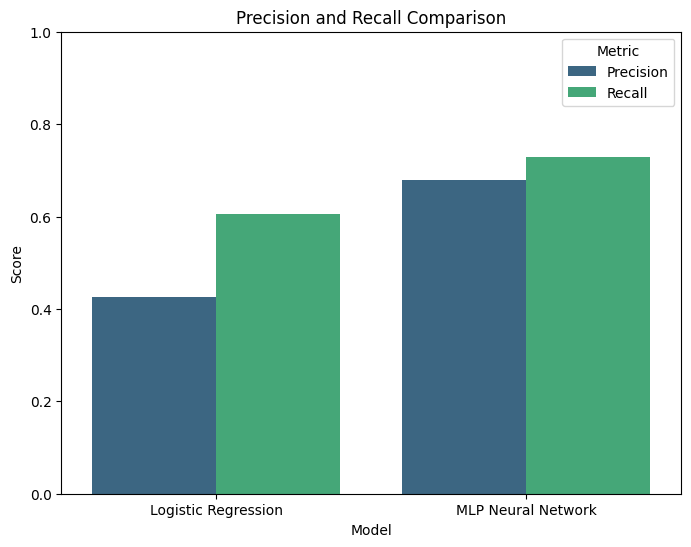

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, precision_score, recall_score

# Assuming X_train_preprocessed, y_train_np, X_test_preprocessed, y_test_np, and MLP model history are already available

# Step 1: Initialize and Train the Baseline Logistic Regression Model
baseline_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
baseline_model.fit(X_train_preprocessed, y_train_np)

# Step 2: Predictions for Logistic Regression Model
y_pred_prob_baseline = baseline_model.predict_proba(X_test_preprocessed)[:, 1]
y_pred_baseline = (y_pred_prob_baseline >= 0.5).astype(int)

# Step 3: Predictions for Pre-trained MLP Model
y_pred_prob_mlp = model.predict(X_test_preprocessed).ravel()
y_pred_mlp = (y_pred_prob_mlp >= 0.5).astype(int)

# Step 4: Plot Confusion Matrices for Both Models
plt.figure(figsize=(12, 5))

# Confusion Matrix - Logistic Regression
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test_np, y_pred_baseline), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix - MLP Model
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test_np, y_pred_mlp), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - MLP Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Step 5: Plot ROC Curves for Both Models
fpr_baseline, tpr_baseline, _ = roc_curve(y_test_np, y_pred_prob_baseline)
auc_score_baseline = roc_auc_score(y_test_np, y_pred_prob_baseline)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test_np, y_pred_prob_mlp)
auc_score_mlp = roc_auc_score(y_test_np, y_pred_prob_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_baseline, tpr_baseline, label=f'Logistic Regression (AUC = {auc_score_baseline:.4f})', color='blue')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Model (AUC = {auc_score_mlp:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Step 6: Plot Precision-Recall Curves for Both Models
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test_np, y_pred_prob_baseline)
pr_auc_baseline = auc(recall_baseline, precision_baseline)

precision_mlp, recall_mlp, _ = precision_recall_curve(y_test_np, y_pred_prob_mlp)
pr_auc_mlp = auc(recall_mlp, precision_mlp)

plt.figure(figsize=(8, 6))
plt.plot(recall_baseline, precision_baseline, label=f'Logistic Regression (AUC = {pr_auc_baseline:.4f})', color='blue')
plt.plot(recall_mlp, precision_mlp, label=f'MLP Model (AUC = {pr_auc_mlp:.4f})', color='green')
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()

# Step 7: Create a Summary Table of Key Metrics
# Extract MLP model metrics from history
mlp_accuracy = history.history['val_accuracy'][-1]
mlp_auc = history.history['val_AUC'][-1]
mlp_precision = history.history['val_precision'][-1]
mlp_recall = history.history['val_recall'][-1]

# Calculate Baseline model metrics
baseline_accuracy = np.mean(y_pred_baseline == y_test_np)
baseline_precision = precision_score(y_test_np, y_pred_baseline, zero_division=0)
baseline_recall = recall_score(y_test_np, y_pred_baseline)

# Create a DataFrame to summarize and compare
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'MLP Neural Network'],
    'Accuracy': [baseline_accuracy, mlp_accuracy],
    'Precision': [baseline_precision, mlp_precision],
    'Recall': [baseline_recall, mlp_recall],
    'ROC-AUC': [auc_score_baseline, mlp_auc]
})

print("\nModel Performance Comparison:")
print(comparison_df)

# Step 8: Visualize ROC-AUC, Precision, and Recall Comparisons
# ROC-AUC Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=comparison_df['Model'], y=comparison_df['ROC-AUC'], palette='viridis')
plt.title('ROC-AUC Score Comparison')
plt.ylabel('ROC-AUC Score')
plt.ylim(0, 1)
plt.show()

# Precision and Recall Comparison
comparison_melted = comparison_df.melt(id_vars='Model', value_vars=['Precision', 'Recall'], var_name='Metric', value_name='Score')
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted, palette='viridis')
plt.title('Precision and Recall Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()
